## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  70.312151  1519.016398  0.248043  3.507059  1.400211
1  93.073414  1468.074572  0.332512  5.336083  1.540835
2  91.296859   842.562134  0.726655  3.428574  1.424044
3   7.864142  1039.880135  0.506834  3.993849  1.569021
4  95.884404   404.123702  0.161702  3.833937  0.470496


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 0.9483383	total: 64.1ms	remaining: 1m 4s
1:	learn: 0.9355077	total: 65.1ms	remaining: 32.5s
2:	learn: 0.9251990	total: 67.2ms	remaining: 22.3s
3:	learn: 0.9135632	total: 68.1ms	remaining: 17s
4:	learn: 0.9020531	total: 68.9ms	remaining: 13.7s
5:	learn: 0.8903550	total: 69.8ms	remaining: 11.6s
6:	learn: 0.8818238	total: 70.6ms	remaining: 10s
7:	learn: 0.8716385	total: 71.2ms	remaining: 8.83s
8:	learn: 0.8613975	total: 71.6ms	remaining: 7.89s
9:	learn: 0.8506534	total: 72.2ms	remaining: 7.15s
10:	learn: 0.8421558	total: 72.9ms	remaining: 6.56s
11:	learn: 0.8318136	total: 73.5ms	remaining: 6.05s
12:	learn: 0.8238755	total: 74ms	remaining: 5.62s
13:	learn: 0.8144863	total: 74.7ms	remaining: 5.26s
14:	learn: 0.8048150	total: 75.1ms	remaining: 4.93s
15:	learn: 0.7962578	total: 75.7ms	remaining: 4.65s
16:	learn: 0.7877888	total: 76.1ms	remaining: 4.4s
17:	learn: 0.7796191	total: 76.7ms	remaining: 4.18s
18:	learn: 0.7721030	total: 77.2ms	remaining: 3.99s
19:	learn: 0.7633714	total: 7

195:	learn: 0.2493549	total: 164ms	remaining: 675ms
196:	learn: 0.2488119	total: 165ms	remaining: 673ms
197:	learn: 0.2481400	total: 166ms	remaining: 671ms
198:	learn: 0.2465643	total: 166ms	remaining: 668ms
199:	learn: 0.2459401	total: 167ms	remaining: 666ms
200:	learn: 0.2451669	total: 167ms	remaining: 664ms
201:	learn: 0.2441805	total: 167ms	remaining: 662ms
202:	learn: 0.2435344	total: 168ms	remaining: 659ms
203:	learn: 0.2423844	total: 168ms	remaining: 657ms
204:	learn: 0.2416079	total: 169ms	remaining: 655ms
205:	learn: 0.2405583	total: 169ms	remaining: 653ms
206:	learn: 0.2399265	total: 170ms	remaining: 650ms
207:	learn: 0.2389645	total: 170ms	remaining: 648ms
208:	learn: 0.2375956	total: 171ms	remaining: 646ms
209:	learn: 0.2367048	total: 171ms	remaining: 644ms
210:	learn: 0.2361298	total: 172ms	remaining: 642ms
211:	learn: 0.2352788	total: 172ms	remaining: 640ms
212:	learn: 0.2345357	total: 172ms	remaining: 637ms
213:	learn: 0.2336138	total: 173ms	remaining: 635ms
214:	learn: 

315:	learn: 0.1769193	total: 220ms	remaining: 477ms
316:	learn: 0.1767006	total: 221ms	remaining: 476ms
317:	learn: 0.1759925	total: 221ms	remaining: 475ms
318:	learn: 0.1757776	total: 222ms	remaining: 474ms
319:	learn: 0.1755045	total: 222ms	remaining: 473ms
320:	learn: 0.1752949	total: 223ms	remaining: 472ms
321:	learn: 0.1750894	total: 224ms	remaining: 471ms
322:	learn: 0.1743655	total: 224ms	remaining: 470ms
323:	learn: 0.1742334	total: 225ms	remaining: 468ms
324:	learn: 0.1735523	total: 225ms	remaining: 467ms
325:	learn: 0.1733513	total: 225ms	remaining: 466ms
326:	learn: 0.1727102	total: 226ms	remaining: 465ms
327:	learn: 0.1723092	total: 226ms	remaining: 464ms
328:	learn: 0.1721848	total: 227ms	remaining: 462ms
329:	learn: 0.1715235	total: 227ms	remaining: 461ms
330:	learn: 0.1708711	total: 228ms	remaining: 460ms
331:	learn: 0.1706758	total: 228ms	remaining: 459ms
332:	learn: 0.1700372	total: 228ms	remaining: 458ms
333:	learn: 0.1698470	total: 229ms	remaining: 456ms
334:	learn: 

524:	learn: 0.0981236	total: 323ms	remaining: 292ms
525:	learn: 0.0978094	total: 323ms	remaining: 291ms
526:	learn: 0.0977669	total: 323ms	remaining: 290ms
527:	learn: 0.0976268	total: 327ms	remaining: 292ms
528:	learn: 0.0973183	total: 328ms	remaining: 292ms
529:	learn: 0.0972765	total: 329ms	remaining: 292ms
530:	learn: 0.0969464	total: 329ms	remaining: 291ms
531:	learn: 0.0966465	total: 330ms	remaining: 290ms
532:	learn: 0.0963157	total: 330ms	remaining: 289ms
533:	learn: 0.0960278	total: 331ms	remaining: 289ms
534:	learn: 0.0958915	total: 331ms	remaining: 288ms
535:	learn: 0.0957588	total: 331ms	remaining: 287ms
536:	learn: 0.0952784	total: 332ms	remaining: 286ms
537:	learn: 0.0951748	total: 332ms	remaining: 285ms
538:	learn: 0.0948923	total: 333ms	remaining: 285ms
539:	learn: 0.0947063	total: 333ms	remaining: 284ms
540:	learn: 0.0946049	total: 334ms	remaining: 283ms
541:	learn: 0.0943267	total: 334ms	remaining: 282ms
542:	learn: 0.0941430	total: 334ms	remaining: 281ms
543:	learn: 

601:	learn: 0.0805383	total: 362ms	remaining: 239ms
602:	learn: 0.0802758	total: 363ms	remaining: 239ms
603:	learn: 0.0800069	total: 363ms	remaining: 238ms
604:	learn: 0.0798011	total: 363ms	remaining: 237ms
605:	learn: 0.0797567	total: 364ms	remaining: 237ms
606:	learn: 0.0795545	total: 364ms	remaining: 236ms
607:	learn: 0.0795107	total: 365ms	remaining: 235ms
608:	learn: 0.0790790	total: 365ms	remaining: 234ms
609:	learn: 0.0790359	total: 366ms	remaining: 234ms
610:	learn: 0.0789825	total: 366ms	remaining: 233ms
611:	learn: 0.0788999	total: 366ms	remaining: 232ms
612:	learn: 0.0786402	total: 367ms	remaining: 232ms
613:	learn: 0.0784255	total: 368ms	remaining: 231ms
614:	learn: 0.0782287	total: 368ms	remaining: 231ms
615:	learn: 0.0781896	total: 369ms	remaining: 230ms
616:	learn: 0.0779376	total: 369ms	remaining: 229ms
617:	learn: 0.0777254	total: 369ms	remaining: 228ms
618:	learn: 0.0775338	total: 370ms	remaining: 228ms
619:	learn: 0.0774925	total: 370ms	remaining: 227ms
620:	learn: 

764:	learn: 0.0531610	total: 450ms	remaining: 138ms
765:	learn: 0.0529540	total: 451ms	remaining: 138ms
766:	learn: 0.0527231	total: 451ms	remaining: 137ms
767:	learn: 0.0527082	total: 452ms	remaining: 137ms
768:	learn: 0.0526934	total: 452ms	remaining: 136ms
769:	learn: 0.0524572	total: 453ms	remaining: 135ms
770:	learn: 0.0524412	total: 454ms	remaining: 135ms
771:	learn: 0.0522776	total: 454ms	remaining: 134ms
772:	learn: 0.0520211	total: 455ms	remaining: 134ms
773:	learn: 0.0518370	total: 455ms	remaining: 133ms
774:	learn: 0.0516923	total: 456ms	remaining: 132ms
775:	learn: 0.0516781	total: 456ms	remaining: 132ms
776:	learn: 0.0515360	total: 457ms	remaining: 131ms
777:	learn: 0.0515219	total: 457ms	remaining: 130ms
778:	learn: 0.0513420	total: 457ms	remaining: 130ms
779:	learn: 0.0512022	total: 458ms	remaining: 129ms
780:	learn: 0.0511883	total: 458ms	remaining: 128ms
781:	learn: 0.0511230	total: 459ms	remaining: 128ms
782:	learn: 0.0509858	total: 459ms	remaining: 127ms
783:	learn: 

854:	learn: 0.0421187	total: 504ms	remaining: 85.4ms
855:	learn: 0.0419131	total: 504ms	remaining: 84.8ms
856:	learn: 0.0418509	total: 505ms	remaining: 84.2ms
857:	learn: 0.0417906	total: 505ms	remaining: 83.6ms
858:	learn: 0.0415964	total: 505ms	remaining: 83ms
859:	learn: 0.0415407	total: 506ms	remaining: 82.4ms
860:	learn: 0.0414820	total: 507ms	remaining: 81.8ms
861:	learn: 0.0414280	total: 507ms	remaining: 81.2ms
862:	learn: 0.0412947	total: 508ms	remaining: 80.7ms
863:	learn: 0.0412420	total: 509ms	remaining: 80.1ms
864:	learn: 0.0410638	total: 509ms	remaining: 79.5ms
865:	learn: 0.0409325	total: 510ms	remaining: 78.8ms
866:	learn: 0.0408766	total: 510ms	remaining: 78.2ms
867:	learn: 0.0407473	total: 510ms	remaining: 77.6ms
868:	learn: 0.0406684	total: 511ms	remaining: 77ms
869:	learn: 0.0404947	total: 511ms	remaining: 76.4ms
870:	learn: 0.0404684	total: 512ms	remaining: 75.8ms
871:	learn: 0.0402587	total: 512ms	remaining: 75.2ms
872:	learn: 0.0401454	total: 512ms	remaining: 74.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.37396327638731175


ABC Pre-generator MAE 0.3724859740061496


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

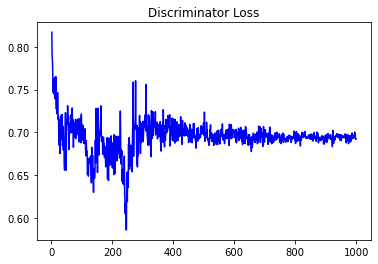

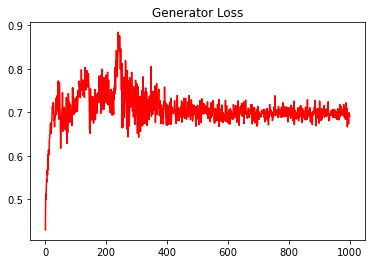

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.6750263314247131


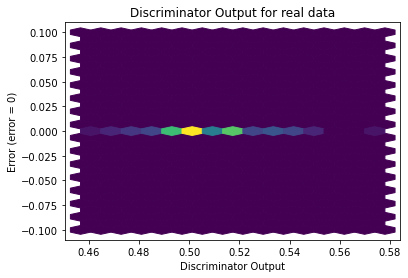

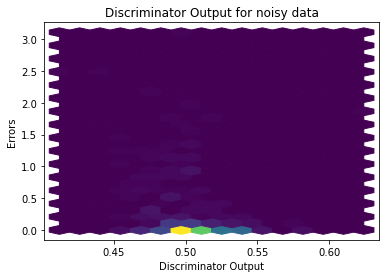

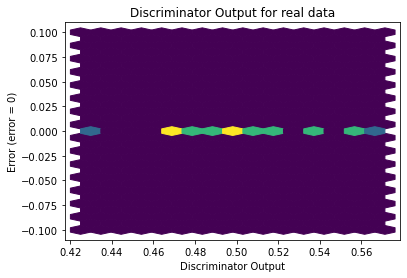

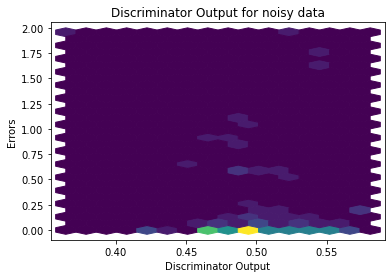

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

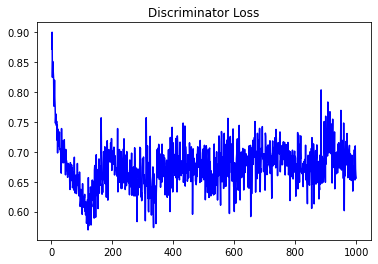

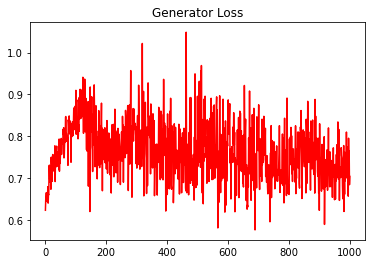

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.0945698609426617


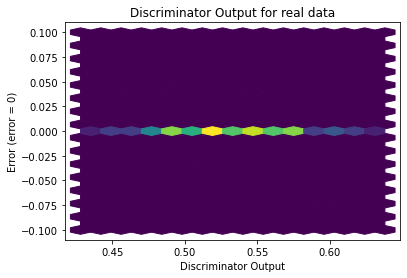

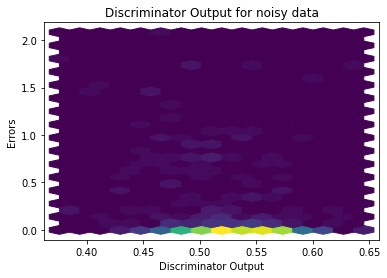

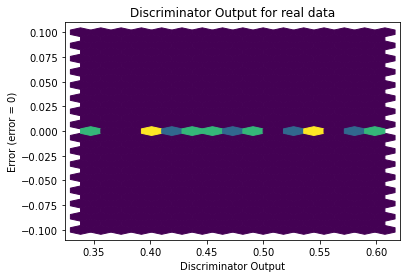

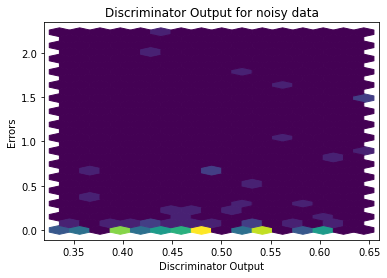

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


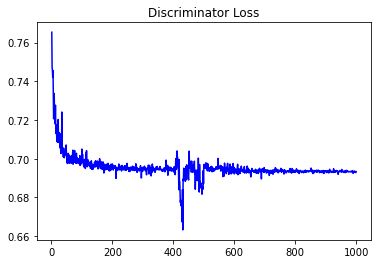

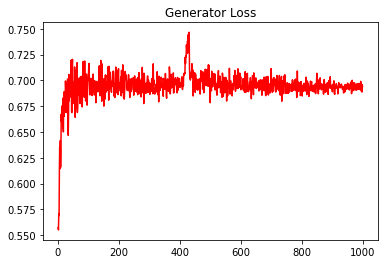

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.3997688323641196


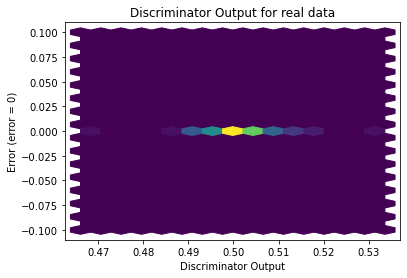

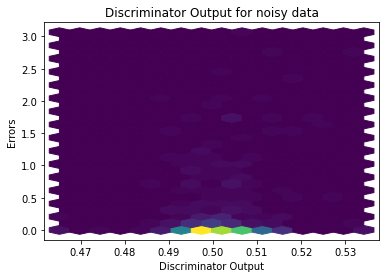

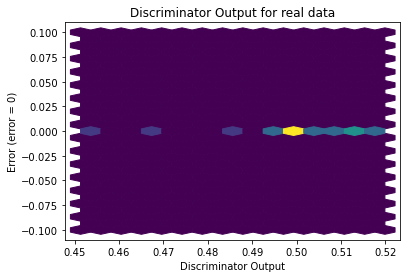

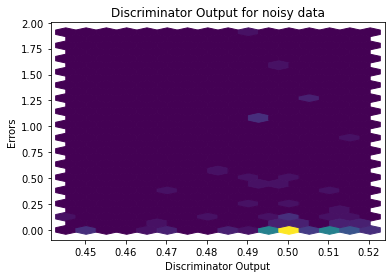

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


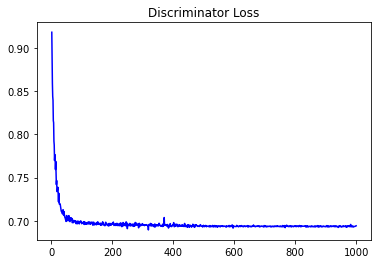

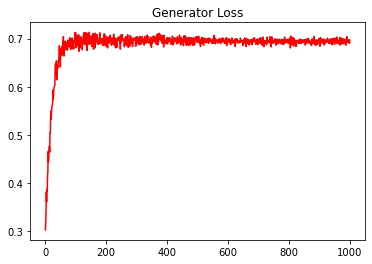

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.35774184395233166


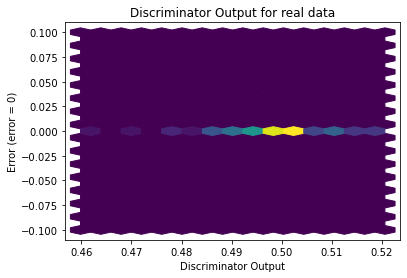

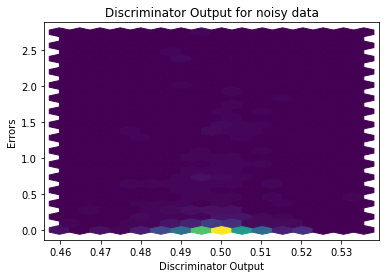

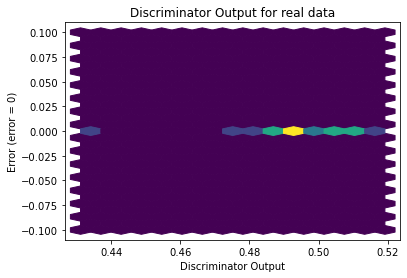

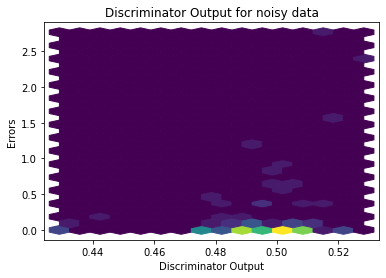

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0830]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0502]], requires_grad=True)
